In [1]:
from filtering import curvefitting as cf
import pandas as pd
from analyseData import loadData as ld
import matplotlib as mpl
from matplotlib import pyplot as plt
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = _convertVel(val)
c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = _convertCur(val)


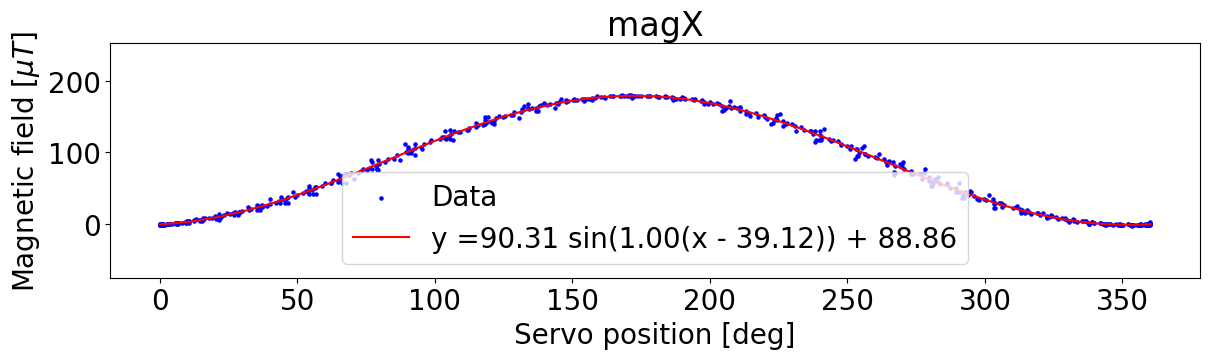

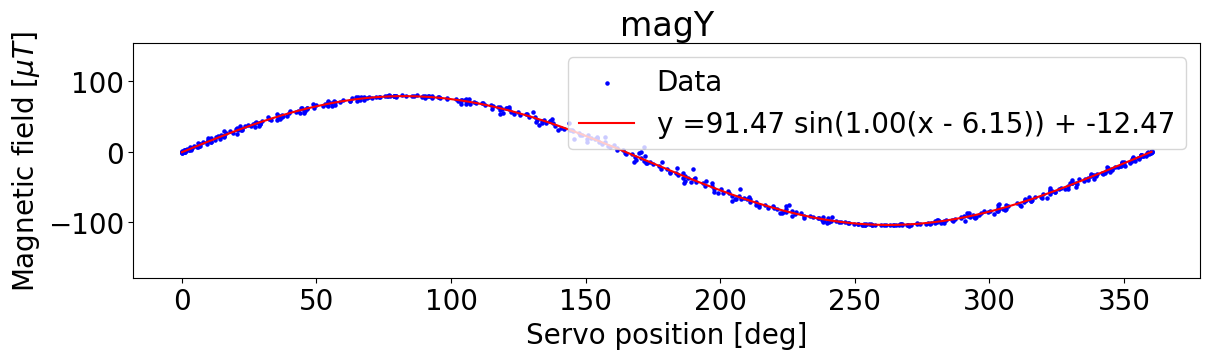

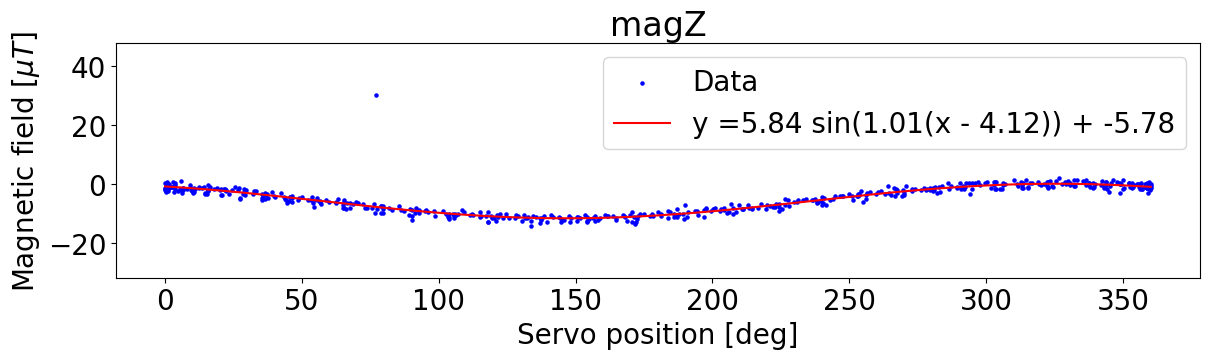

In [2]:
def estimate_sine_params(df_IMU, df_servo, savefig = False, directory = None):
    df_mag_servo = df_servo.copy()
    
    df_mag_servo['magX'] = df_mag_servo['magX']  - df_IMU['magX'].mean() 
    df_mag_servo['magY'] = df_mag_servo['magY']  - df_IMU['magY'].mean() 
    df_mag_servo['magZ'] = df_mag_servo['magZ']  - df_IMU['magZ'].mean() 
    params = cf.fit_magnetometer_data(df_mag_servo, init_guess=[1, 1, 1, 1])
    cf.plot_magsinefit(df_mag_servo, params, savefig=savefig, directory=directory)


                    
df_true_IMU = ld.laodTestData("Data/projectThesisTest1/newCurrentMeas/woLoad/pureIMUdata2023-05-16 09%3A22%3A14.928527.csv") 
df_true_IMU = df_true_IMU.dropna()
df_servo = ld.laodTestData("Data/projectThesisTest1/newCurrentMeas/woLoad/servoData2023-05-16 09%3A22%3A14.928527.csv")
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, savefig = False, directory = "Data/projectThesisTest1/newCurrentMeas/woLoad")

# With load


c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = _convertVel(val)
c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = _convertCur(val)


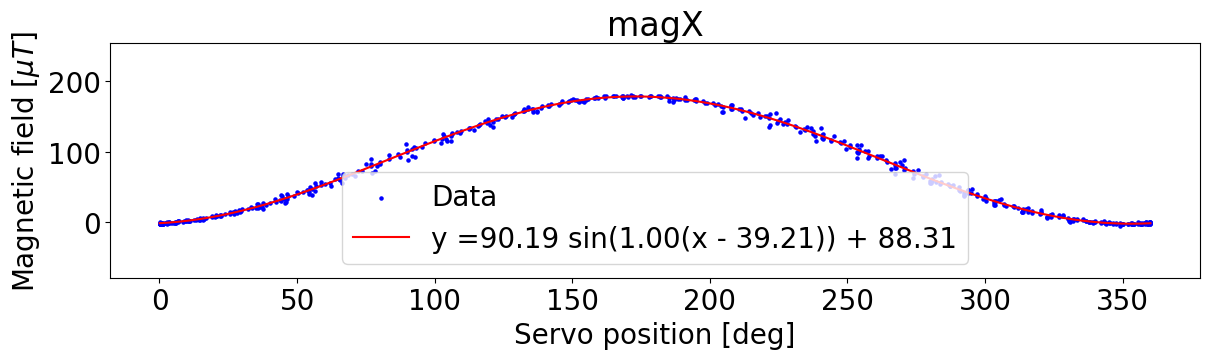

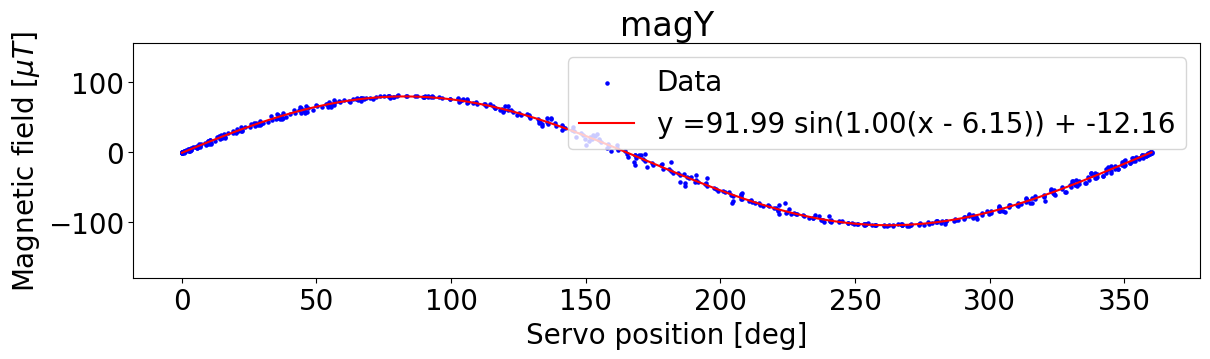

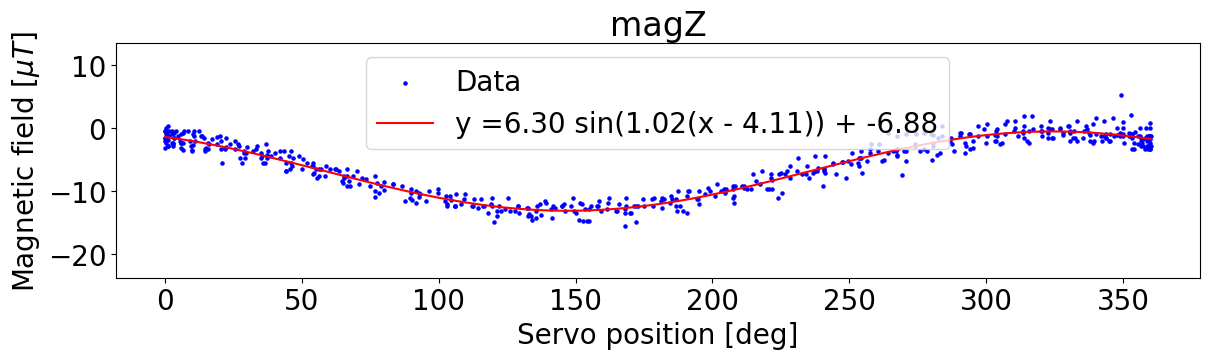

In [3]:
df_true_IMUl = ld.laodTestData("Data/projectThesisTest1/newCurrentMeas/wLoad/pureIMUdata2023-05-16 08%3A46%3A23.906719.csv")
df_true_IMUl = df_true_IMUl.dropna()
df_servol = ld.laodTestData("Data/projectThesisTest1/newCurrentMeas/wLoad/servoData2023-05-16 08%3A46%3A23.906719.csv") 
df_servol = df_servol.dropna()
estimate_sine_params(df_true_IMUl, df_servol, savefig = False, directory="Data/projectThesisTest1/newCurrentMeas/wLoad")

# Shielding

c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = _convertVel(val)
c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = _convertCur(val)


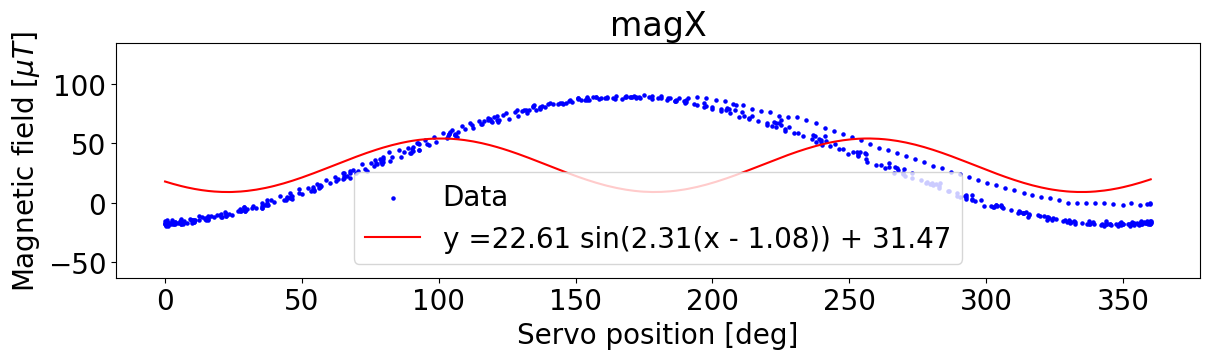

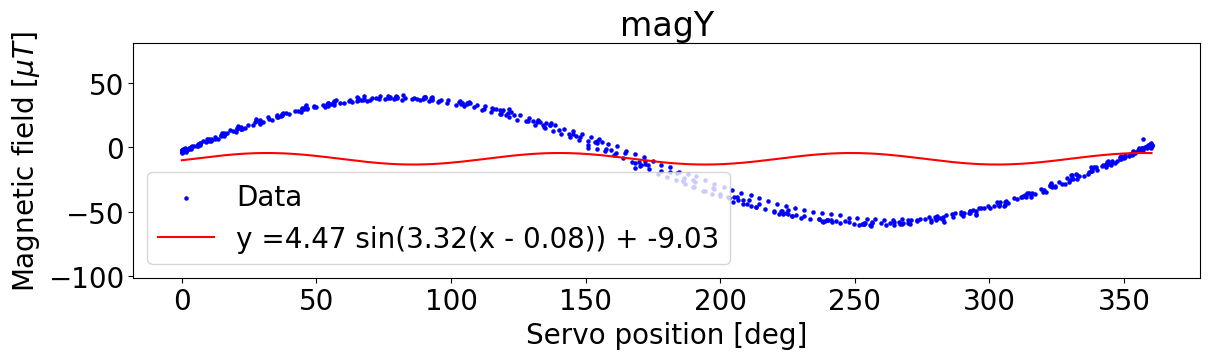

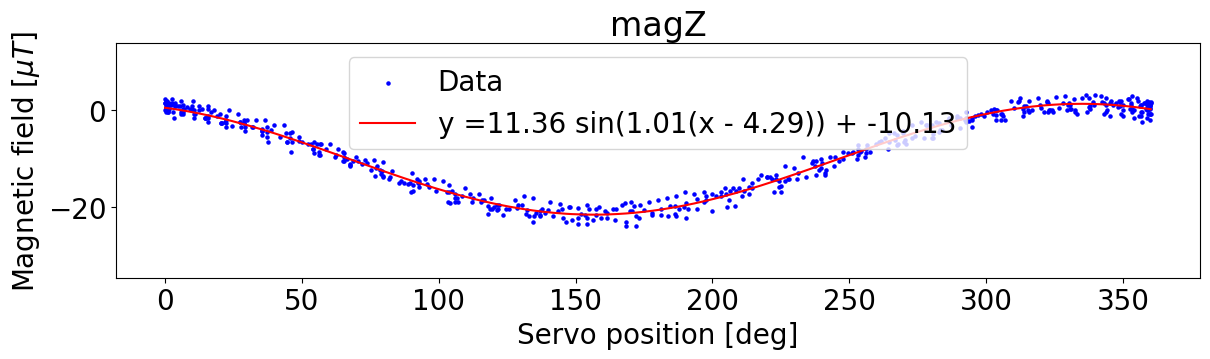

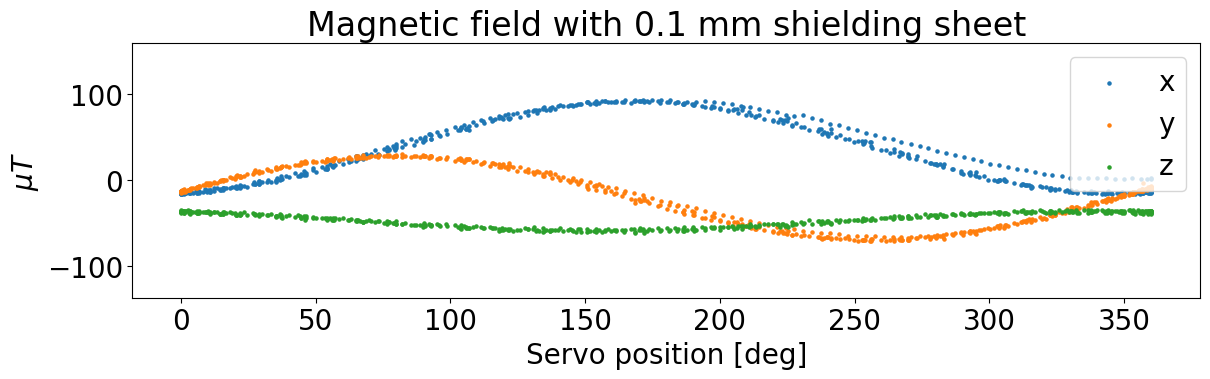

In [4]:
df_true_IMUs = ld.laodTestData("Data/shielding1/pureIMUdata2023-05-27 17%3A26%3A04.212748.csv")
df_true_IMUs = df_true_IMUs.dropna()
df_servos = ld.laodTestData("Data/shielding1/servoData2023-05-27 17%3A26%3A04.212748.csv")
df_servos = df_servos.dropna()
estimate_sine_params(df_true_IMUs, df_servos, savefig =False, directory='Data/shielding1')


df = df_servos.sort_values(by=['servoPos'])
Directions = ['magX', 'magY', 'magZ']

'''PLOT MAG VS POS AND FITTED CURVE'''
plt.rcParams["figure.figsize"] = [12.50, 4.2]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = 20
plt.rcParams['axes.ymargin'] = .4
plt.rcParams['svg.fonttype'] = 'none'

plt.figure()
plt.title('Magnetic field with 0.1 mm shielding sheet')

for direction in Directions:
    plt.scatter(df['servoPos'], df[direction], s = 5, label = 'Data')
    plt.legend(['x', 'y', 'z'])
    plt.xlabel('Servo position [deg]')
    plt.ylabel(r'$\mu T$')

#plt.savefig('figuresAndResults/shieldinghysteris.svg', format = 'svg')

c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = _convertVel(val)
c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = _convertCur(val)


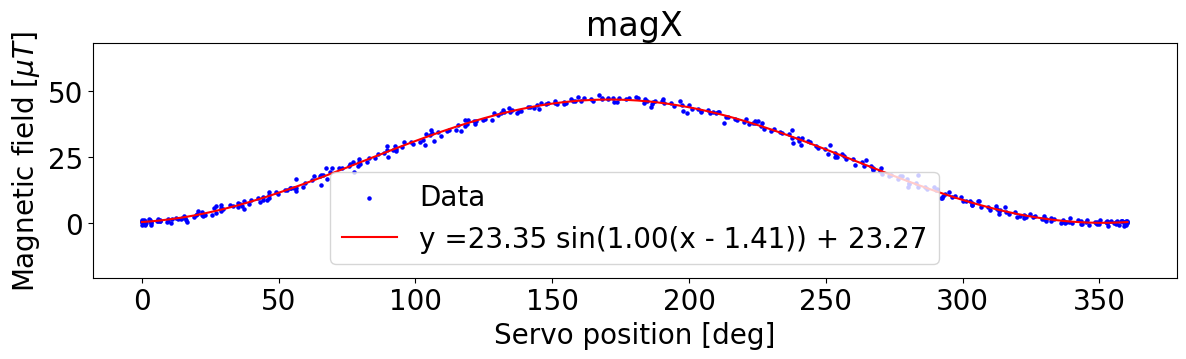

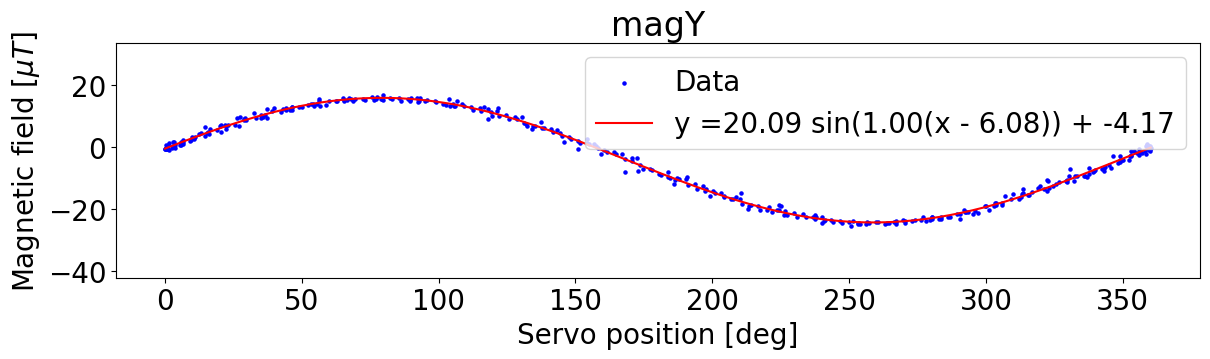

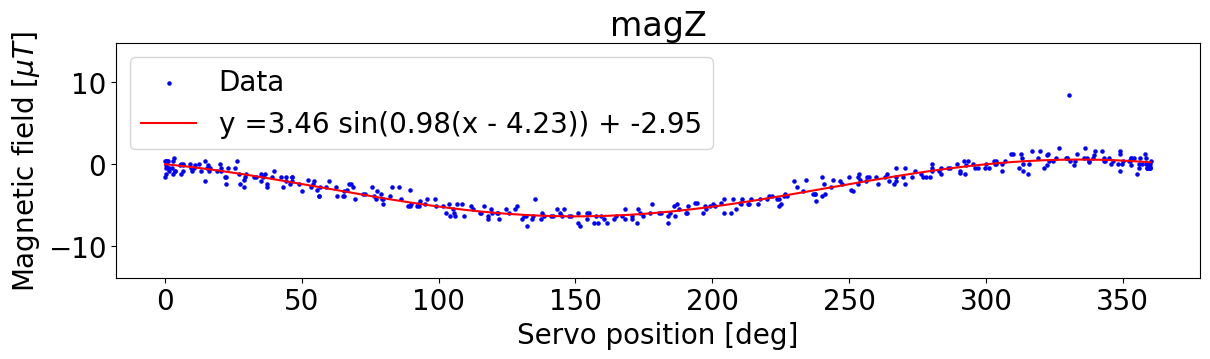

In [5]:
df_true_IMUd = ld.laodTestData("Data/shieldingtestV2/pureIMUdataavstand2.csv")
df_true_IMUd = df_true_IMUd.dropna()
df_servod = ld.laodTestData("Data/shieldingtestV2/servoDataavstand2.csv") 
df_servod = df_servod.dropna()

estimate_sine_params(df_true_IMUd, df_servod, savefig = False, directory="Data/shieldingtestV2/")

# Heading estimate on camera tripod

c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = _convertVel(val)
c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = _convertCur(val)


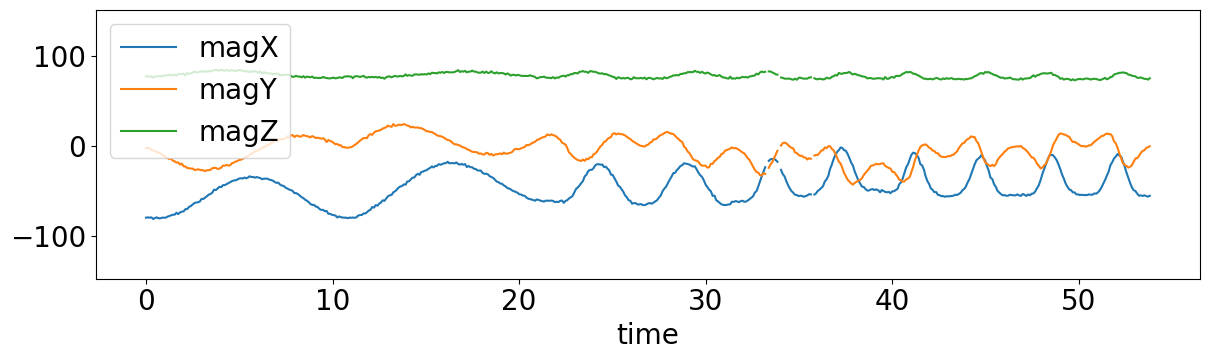

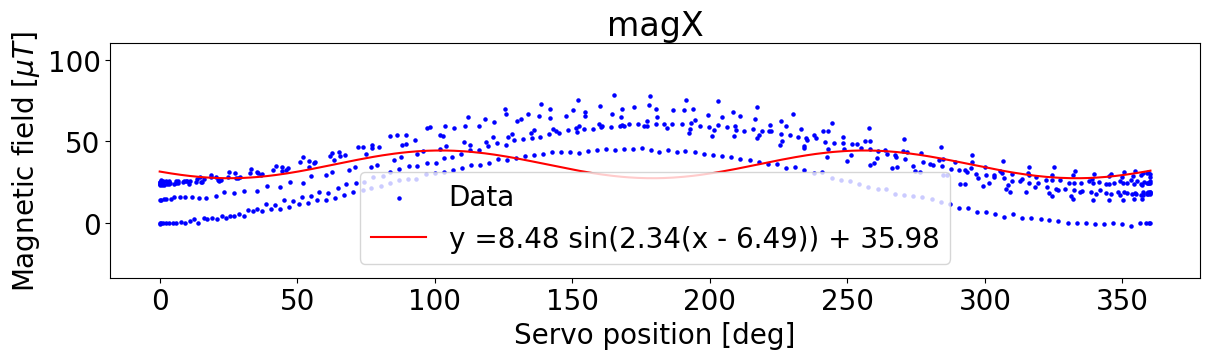

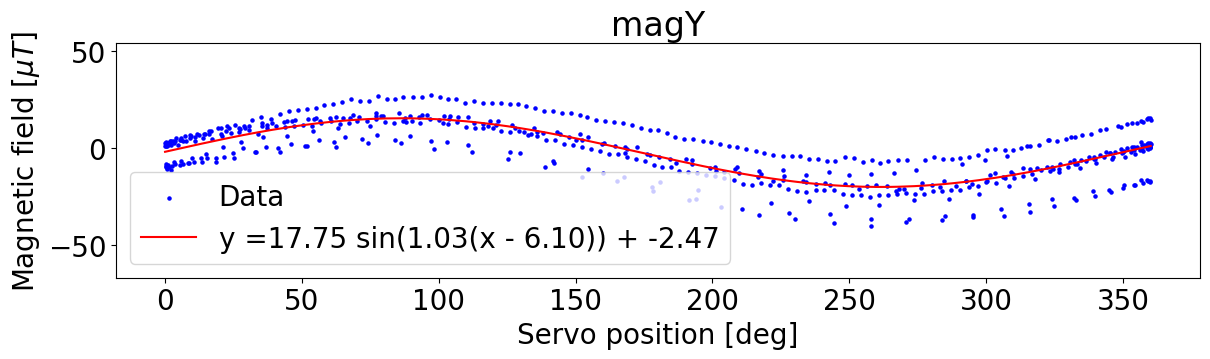

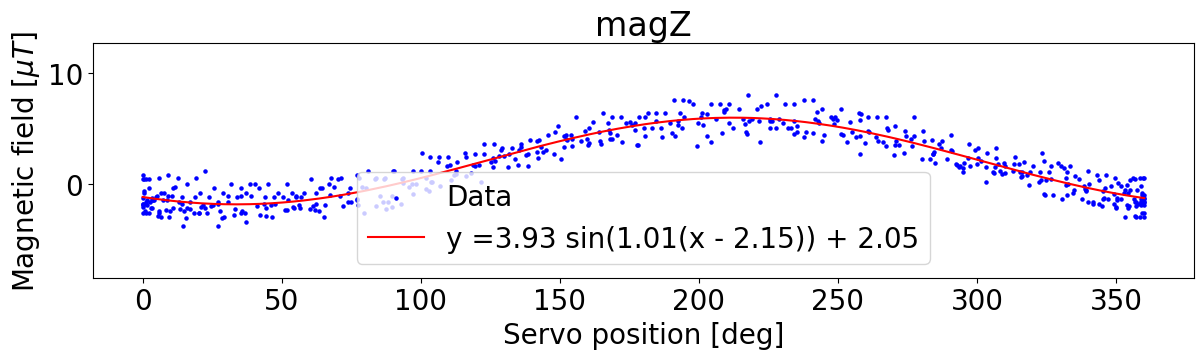

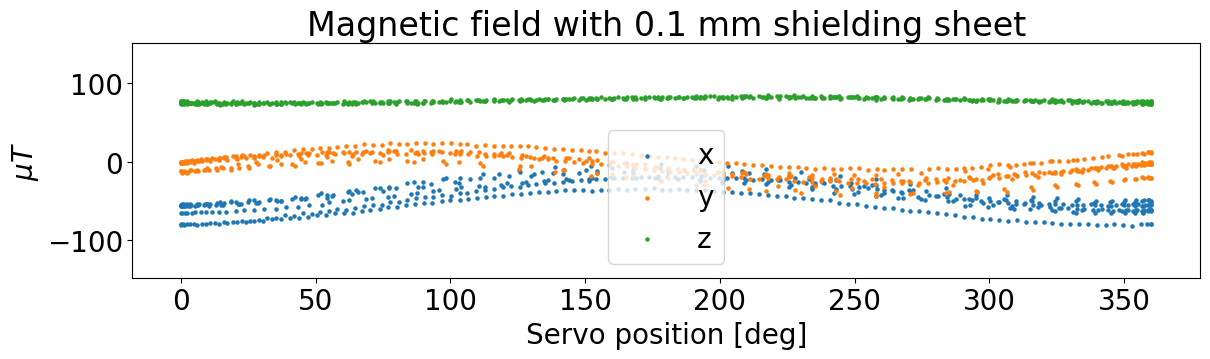

In [6]:
# distance and camera stand moving test

df_true_IMUd1 = ld.laodTestData("Data/movingMavtsnad/pureIMUdata2023-06-13 11%3A36%3A05.838836.csv")
df_true_IMUd1 = df_true_IMUd1.dropna()
df_servod1 = ld.laodTestData("Data/movingMavtsnad/servoData2023-06-13 11%3A36%3A05.838836.csv") 
df_servod1[['time', 'magX', 'magY', 'magZ']].set_index('time').plot()
df_servod1 = df_servod1.dropna()
plt.figure()
estimate_sine_params(df_true_IMUd1, df_servod1, savefig = False, directory="Data/movingMavtsnad")

plt.figure()
plt.title('Magnetic field with 0.1 mm shielding sheet')
Directions = ['magX', 'magY', 'magZ']

for direction in Directions:
    plt.scatter(df_servod1['servoPos'], df_servod1[direction], s = 5, label = 'Data')
    plt.legend(['x', 'y', 'z'])
    plt.xlabel('Servo position [deg]')
    plt.ylabel(r'$\mu T$')
#plt.savefig('figuresAndResults/CameraStandhysteris.svg', format = 'svg')

# Heading experiment without camera tripod
See that it now is normal again :)

c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = _convertVel(val)
c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\analyseData\loadData.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = _convertCur(val)


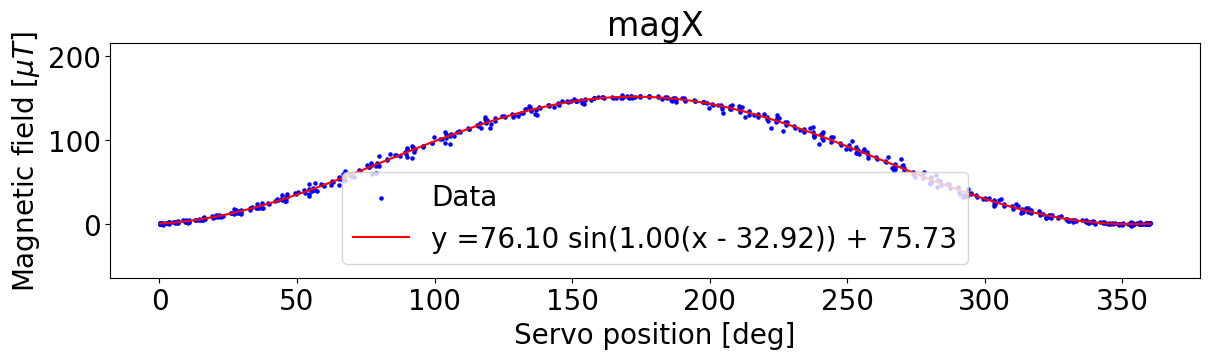

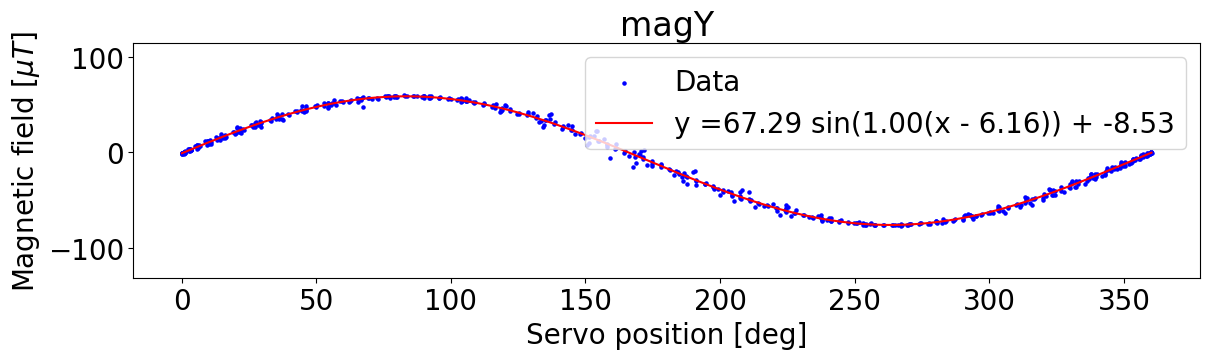

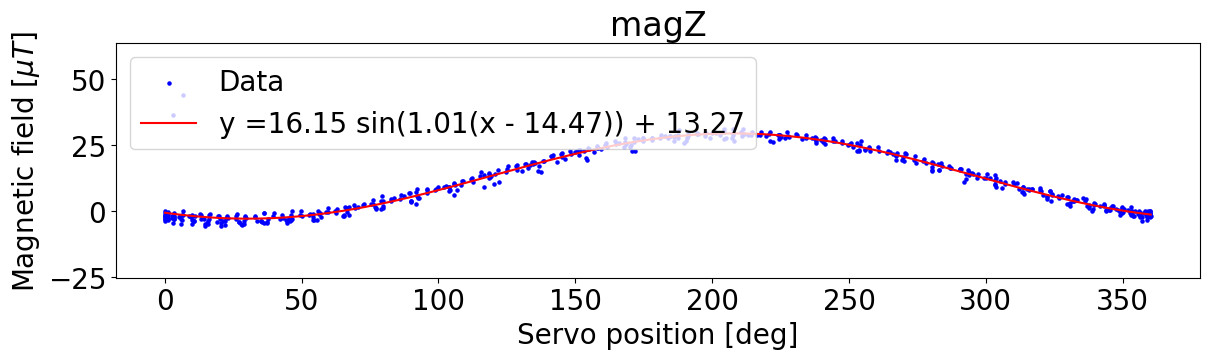

In [7]:
# vanlig

df_true_IMUny = ld.laodTestData("Data/nybevegelse/pureIMUdataStille.csv")
df_true_IMUny = df_true_IMUny.dropna()
df_servony = ld.laodTestData("Data/nybevegelse/servoDataStille.csv") 
df_servony = df_servony.dropna()
estimate_sine_params(df_true_IMUny, df_servony, savefig = False, directory="Data/nybevegelse")